<a href="https://colab.research.google.com/github/j-buss/wi-dpi-analysis/blob/dev-analysis-foundation/analysis/yearly_comparison/Yearly_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt

from google.cloud import bigquery
%matplotlib inline
plt.style.use('bmh')

In [0]:
# Authenticate to GCS.
from google.colab import auth
auth.authenticate_user()

In [0]:
project_id='wi-dpi-010'
dataset_name='Merged'

In [0]:
bq_client = bigquery.Client(project=project_id)

In [0]:
sql='''
  SELECT
    *
  FROM
    {}.{}
'''.format(dataset_name,'Educator_Role_Summary_by_Year')

In [0]:
df_educator_role_summary_by_year = pd.read_gbq(sql, project_id=project_id)

In [0]:
salaried_df = pd.DataFrame(df_educator_role_summary_by_year[df_educator_role_summary_by_year['Salary_Cnt'] != 0]\
          .groupby('Year').count().iloc[:,0])
salaried_df.columns = ["Salaried"]

In [0]:
non_salaried_df = pd.DataFrame(df_educator_role_summary_by_year[df_educator_role_summary_by_year['Salary_Cnt'] == 0]\
          .groupby('Year').count().iloc[:,0])
non_salaried_df.columns = ["Non Salaried"]

In [0]:
plot_df.columns = ["Salaried"]

In [69]:
plot_df['Salaried']

Year
2015    72760
2016    71787
2017    73055
2018    73358
2019    73755
Name: Salaried, dtype: int64

In [0]:
salary_count_df = pd.merge(salaried_df,
         non_salaried_df,
         right_index=True,
         left_index=True)

In [0]:
salary_count_df['total'] = salary_count_df["Salaried"] + salary_count_df["Non Salaried"]
salary_count_df['ratio'] = salary_count_df["Salaried"] / salary_count_df["total"]

In [80]:
salary_count_df

,Salaried,Non Salaried,total,ratio
Year,,,,
2015,72760,61947,134707,0.540135
2016,71787,71713,143500,0.500258
2017,73055,71732,144787,0.504569
2018,73358,70122,143480,0.511277
2019,73755,71248,145003,0.508645


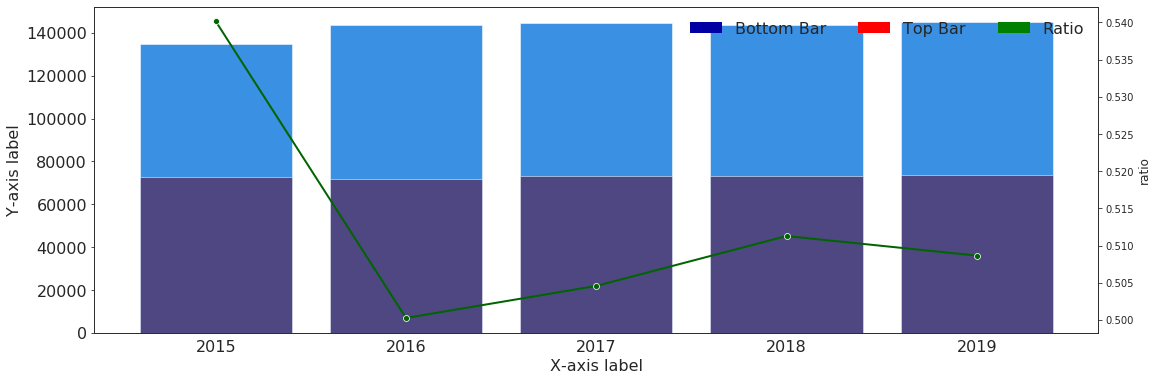

In [83]:
#Set general plot properties
sns.set_style("white")
sns.set_context({"figure.figsize": (18, 6)})
palette = sns.color_palette("muted",3)
top_plot = sns.barplot(x = salary_count_df.index, y = salary_count_df.total, color="dodgerblue")

#Plot 2 - overlay - "bottom" series
bottom_plot = sns.barplot(x = salary_count_df.index, y = salary_count_df["Salaried"], color="darkslateblue")
ax2 = bottom_plot.twinx()

#Plot 3 - Overlay - Line Plot of the Ration
sns.lineplot(x = salary_count_df.index, y = salary_count_df.ratio, 
                          markers=True, marker="o", dashes=False, color="darkgreen", ax=ax2)

topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
ratiobar = plt.Rectangle((0,0),1,1,fc='green',  edgecolor = 'none')
l = plt.legend([bottombar, topbar, ratiobar], ['Bottom Bar', 'Top Bar', 'Ratio'], loc=1, ncol = 3, prop={'size':16})
l.draw_frame(False)

#Optional code - Make plot look nicer
#sns.despine(left=True)
bottom_plot.set_ylabel("Y-axis label")
bottom_plot.set_xlabel("X-axis label")

#Set fonts to consistent 16pt size
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)